# Series 8
# Introduction to Computational Finance
# Dimitris Proios

## Minority Game
- Implement a Minority Game.

9999th round
19999th round
29999th round
39999th round
49999th round
59999th round
69999th round
79999th round
89999th round
99999th round
[94.83448344834484, 94.84674233711685, 94.82172739091303, 94.82659566489163, 94.83263665273306, 94.84498074967917, 94.846554950785, 94.84372304653809, 94.84375381948688, 94.83721837218373]
[4.266746714237138, 4.277134315994883, 4.292066401787528, 4.291467360425202, 4.284609343656194, 4.2849261497814926, 4.277230648492754, 4.280234435656888, 4.2770955354667235, 4.273834936362739]


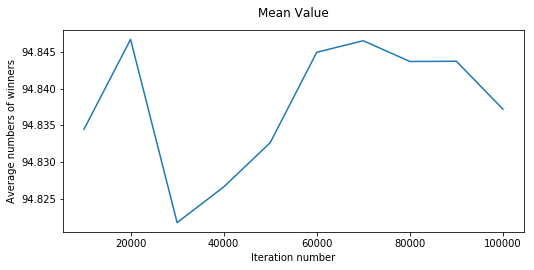

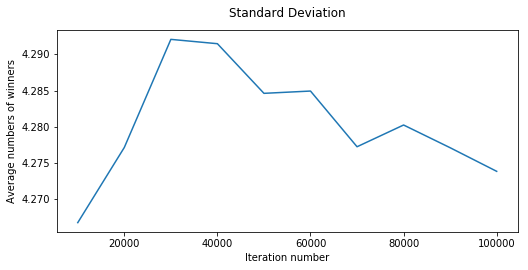

In [4]:
import random
import numpy as np

class Agent(object):
    def __init__(self):
        self.history = []
        
    def predict(self):
        return random.randint(0, 1)

class MinorityGame(object):
    def __init__(self, A, run_num):
        self.A = A
        self.run_num = run_num
        self.N = []
        self.M = np.zeros(run_num)

    @property
    def score_mean_std(self):
        """
        :return: the winner number mean and stdd
        """
        return self.M.mean(), self.M.std()
    
class MinorityGameWithRandomChoice(MinorityGame):
    """
    a Class for random choice Minority Game
    """
    def __init__(self, A, run_num):
        super(MinorityGameWithRandomChoice,self).__init__(A, run_num)
        for i in range(self.A):
            self.N.append(Agent())

    def run_game(self):
        mean_list = []
        stdd_list = []
        for i in range(self.run_num):
            num_of_one = 0
            for agent in self.N:
                num_of_one+=agent.predict()
            game_result = 1 if num_of_one<self.A/2 else 0
            winner_num = num_of_one if game_result == 1 else self.A - num_of_one
            self.M[i] = winner_num
            if (i+1)%10000 == 0:
                mean_list.append(self.M[:i].mean())
                stdd_list.append(self.M[:i].std())
                print("%dth round"%i)
        return mean_list,stdd_list


import matplotlib.pyplot as plt
# set agent num
A = 201
# set round number from 10000 to 100000
rounds = range(10000,110000,10000)

mean_list = []
stdd_list = []
round_num = 100000

# Run the game for different round number
game = MinorityGameWithRandomChoice(A, round_num)
mean_list,stdd_list = game.run_game()

# print result
print(mean_list)
print(stdd_list)
# plot mean
fig = plt.figure(figsize=(8, 4))
plt.plot(rounds,mean_list)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
fig.suptitle('Mean Value')
plt.xlabel('Iteration number')
plt.ylabel('Average numbers of winners')
fig.savefig('ex3-1-mean.jpg')

# plot SD
fig2 = plt.figure(figsize=(8, 4))
plt.plot(rounds,stdd_list)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)
fig2.suptitle('Standard Deviation')
plt.xlabel('Iteration number')
plt.ylabel('Average numbers of winners')
fig2.savefig('ex3-1-std.jpg')


- Draw the curve describing how the variance ${\sigma^2/N}$ of the participation A
depends on the parameter    ${a=2^M/N }$


- Here N denotes the number of agents and the length of the historical window taken into consideration by an agent.


- When S = 2 ( S
being the number of strategies), what is the critical value
$α_c$
for which  ${\sigma^2/N }$ reaches a minimum
